In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from MCMC_visu import quantiles_to_plot,quantiles_to_plot_calibration

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from MCMC_visu import quantiles_to_plot,quantiles_to_plot_calibration

In [6]:
nb_mcmc = 100
nb_classe = 4
nb_compartiment = 7

In [7]:


CLASSE = []
QUANTILES = []

file_path = '../data/MCMC_result/data_MCMC' + str(0) + '.csv'

for classe in range(nb_classe):
    # Initialisation des dictionnaires pour stocker les données
    data_S = {}
    data_I = {}
    data_R = {}
    data_Q = {}
    data_D = {}
    data_Q_entry = {}
    data_D_entry = {}

    CLASSE_temp = []
    CLASSE_temp.append(data_S)
    CLASSE_temp.append(data_I)
    CLASSE_temp.append(data_R)
    CLASSE_temp.append(data_Q)
    CLASSE_temp.append(data_D)
    CLASSE_temp.append(data_Q_entry)
    CLASSE_temp.append(data_D_entry)
    

    for i in range(nb_mcmc):
        file_path = '../data/MCMC_result/data_MCMC' + str(i) + '.csv'
        # Lecture du fichier CSV
        df = pd.read_csv(file_path)
        
        # Stockage des colonnes dans les dictionnaires
        CLASSE_temp[0][i] = df.iloc[:,classe*nb_compartiment + 0]
        CLASSE_temp[1][i] = df.iloc[:,classe*nb_compartiment + 1]
        CLASSE_temp[2][i] = df.iloc[:,classe*nb_compartiment + 2]
        CLASSE_temp[3][i] = df.iloc[:,classe*nb_compartiment + 3]
        CLASSE_temp[4][i] = df.iloc[:,classe*nb_compartiment + 4]
        CLASSE_temp[5][i] = df.iloc[:,classe*nb_compartiment + 5]
        CLASSE_temp[6][i] = df.iloc[:,classe*nb_compartiment + 6]

    # Création des DataFrames finaux
    CLASSE_temp[0] = pd.DataFrame(CLASSE_temp[0]).transpose()*17282163
    CLASSE_temp[1] = pd.DataFrame(CLASSE_temp[1]).transpose()*17282163
    CLASSE_temp[2] = pd.DataFrame(CLASSE_temp[2]).transpose()*17282163
    CLASSE_temp[3] = pd.DataFrame(CLASSE_temp[3]).transpose()*17282163
    CLASSE_temp[4] = pd.DataFrame(CLASSE_temp[4]).transpose()*17282163
    CLASSE_temp[5] = pd.DataFrame(CLASSE_temp[5]).transpose()*17282163
    CLASSE_temp[6] = pd.DataFrame(CLASSE_temp[6]).transpose()*17282163





    QUANTILES_temp = []

    QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))


    CLASSE.append(CLASSE_temp)
    QUANTILES.append(QUANTILES_temp)


#calcul du total

CLASSE_temp=CLASSE[0]
for classe in range(1,nb_classe):
    for comp in range(nb_compartiment):
            CLASSE_temp[comp] = CLASSE_temp[comp] + CLASSE[classe][comp]



QUANTILES_temp = []
QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))

QUANTILES.append(QUANTILES_temp)
CLASSE.append(CLASSE_temp)






In [8]:
def horizontal_line_for_period(ax):
    date_periode = [21,77,98,133,189,233]
    ax.axvline(x=date_periode[0], linestyle='dashed', color='red',linewidth=0.5)
    ax.axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
    ax.axvline(x=date_periode[2], linestyle='dashed', color='red',linewidth=0.5)
    ax.axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
    ax.axvline(x=date_periode[4], linestyle='dashed', color='red',linewidth=0.5)
    ax.axvline(x=date_periode[5], linestyle='dashed', color='red',linewidth=0.5)
    
        

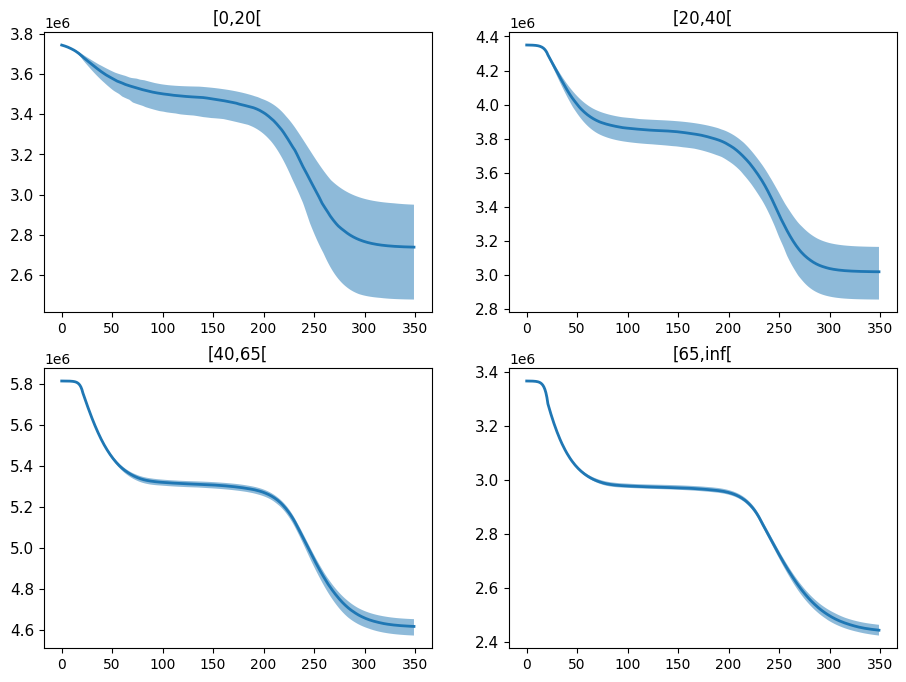

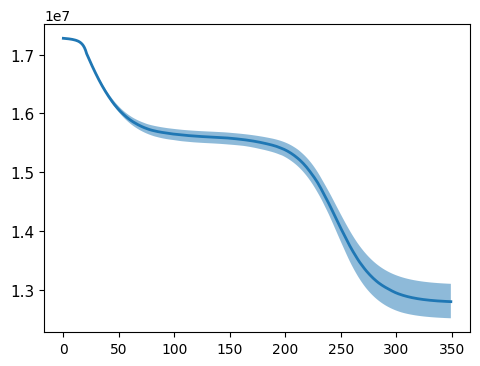

In [9]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,0,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,0,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,0,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,0,ax[1][1],"[65,inf[")





fig1.savefig('./visu_compartiment/S_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,0,ax[0][0],"")


fig1.savefig('./visu_compartiment/S_4-total.pdf')


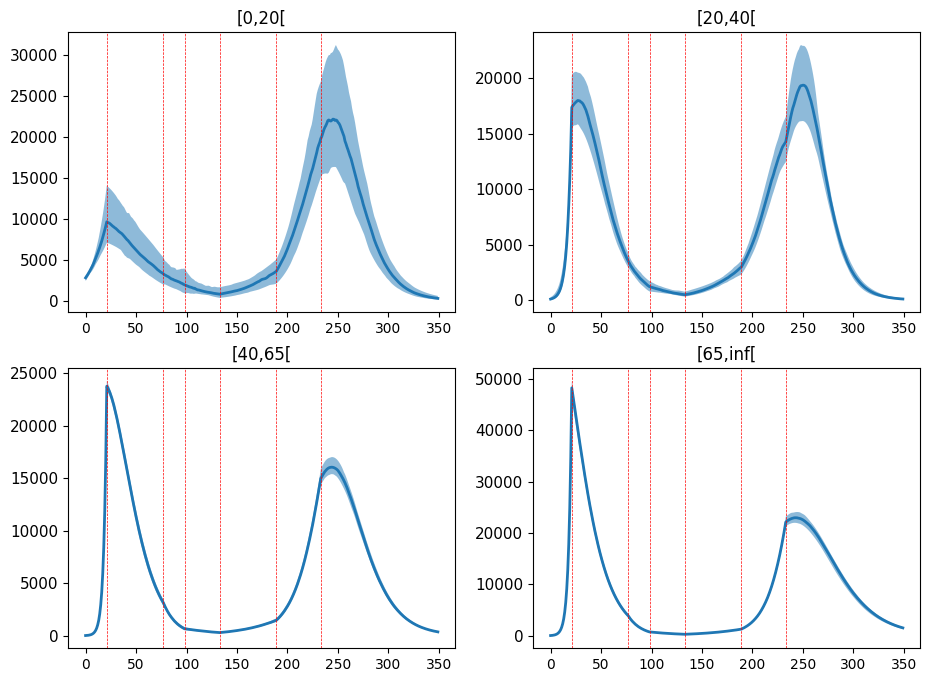

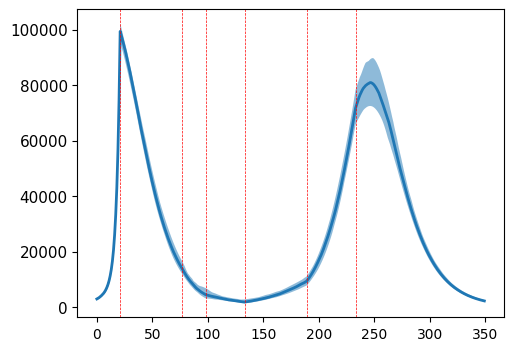

In [10]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,1,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,1,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,1,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,1,ax[1][1],"[65,inf[")

horizontal_line_for_period(ax[0][0])
horizontal_line_for_period(ax[0][1])
horizontal_line_for_period(ax[1][0])
horizontal_line_for_period(ax[1][1])


fig1.savefig('./visu_compartiment/I_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,1,ax[0][0],"")
horizontal_line_for_period(ax[0][0])
fig1.savefig('./visu_compartiment/I_4-total.pdf')


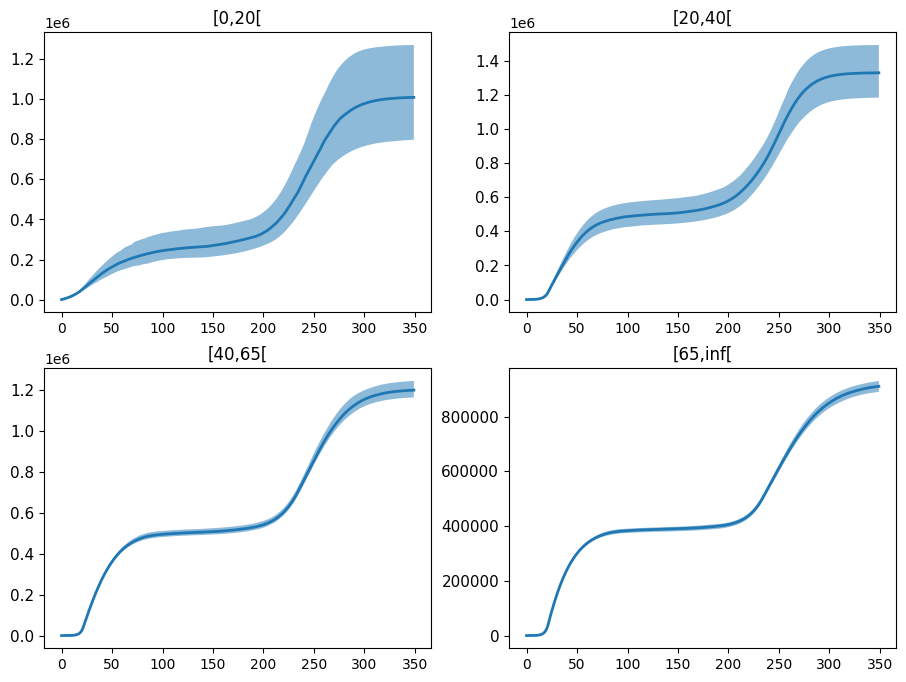

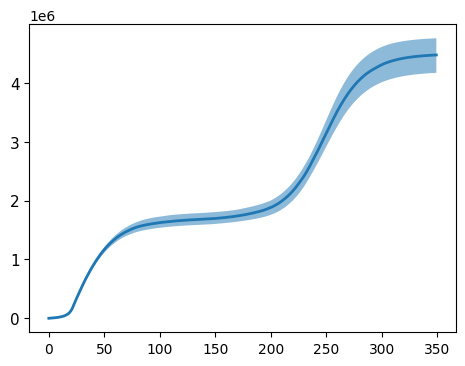

In [11]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,2,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,2,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,2,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,2,ax[1][1],"[65,inf[")


fig1.savefig('./visu_compartiment/R_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,2,ax[0][0],"")
fig1.savefig('./visu_compartiment/R_4-total.pdf')


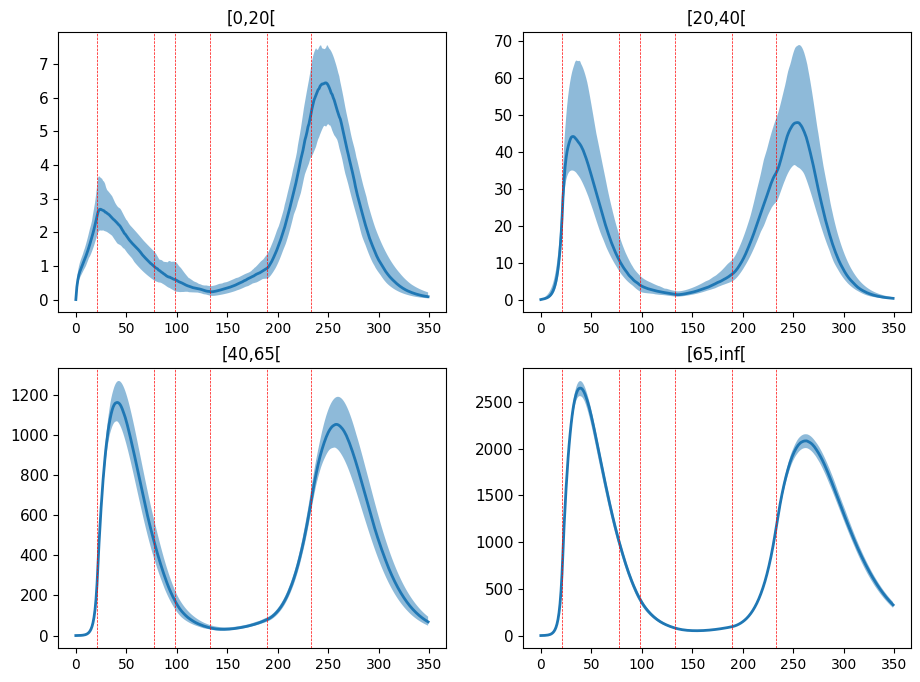

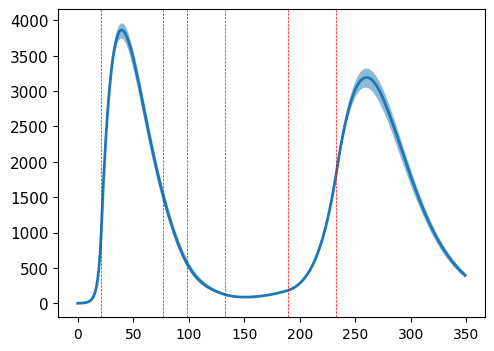

In [12]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,3,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,3,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,3,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,3,ax[1][1],"[65,inf[")

horizontal_line_for_period(ax[0][0])
horizontal_line_for_period(ax[0][1])
horizontal_line_for_period(ax[1][0])
horizontal_line_for_period(ax[1][1])

fig1.savefig('./visu_compartiment/Q_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,3,ax[0][0],"")
horizontal_line_for_period(ax[0][0])
fig1.savefig('./visu_compartiment/Q_4-total.pdf')


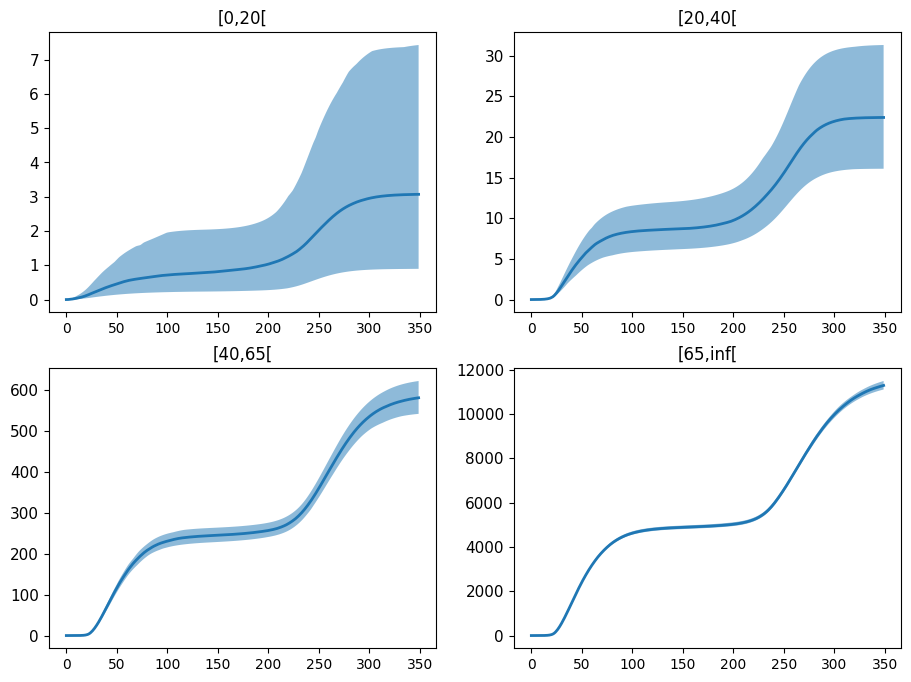

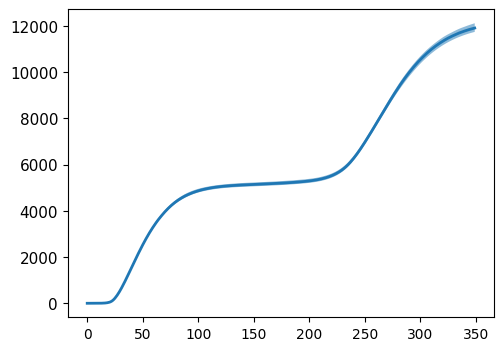

In [13]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,4,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,4,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,4,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,4,ax[1][1],"[65,inf[")


fig1.savefig('./visu_compartiment/D_4.pdf')

nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,4,ax[0][0],"")
fig1.savefig('./visu_compartiment/D_4-total.pdf')


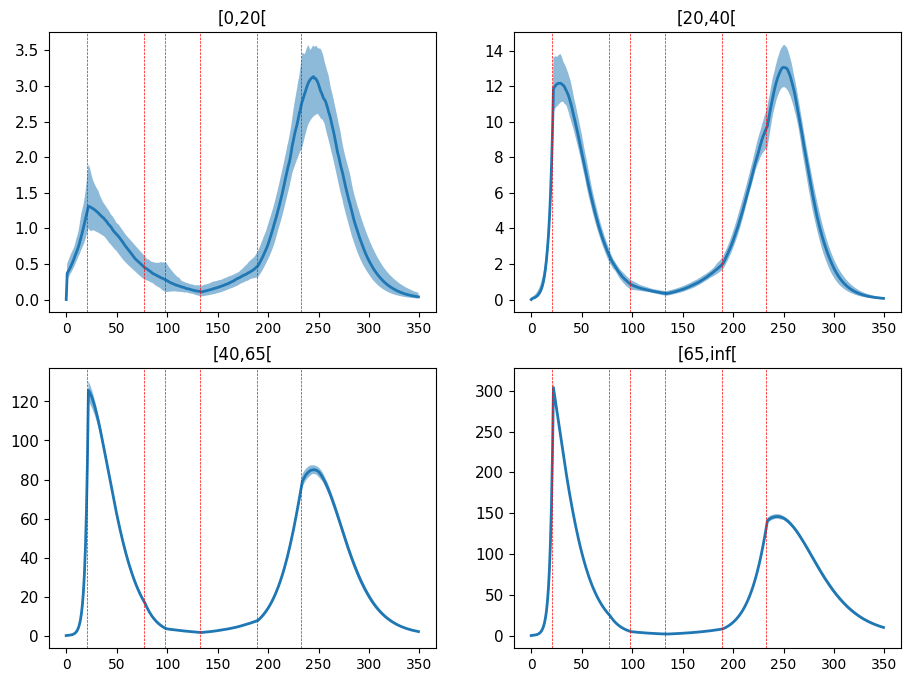

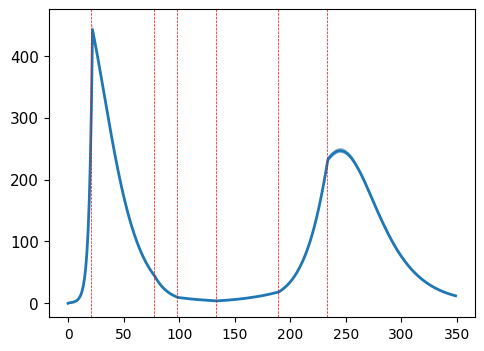

In [14]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,5,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,5,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,5,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,5,ax[1][1],"[65,inf[")

horizontal_line_for_period(ax[0][0])
horizontal_line_for_period(ax[0][1])
horizontal_line_for_period(ax[1][0])
horizontal_line_for_period(ax[1][1])


fig1.savefig('./visu_compartiment/Q_entry_4.pdf')



nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,5,ax[0][0],"")
horizontal_line_for_period(ax[0][0])
fig1.savefig('./visu_compartiment/Q_entry_4-total.pdf')

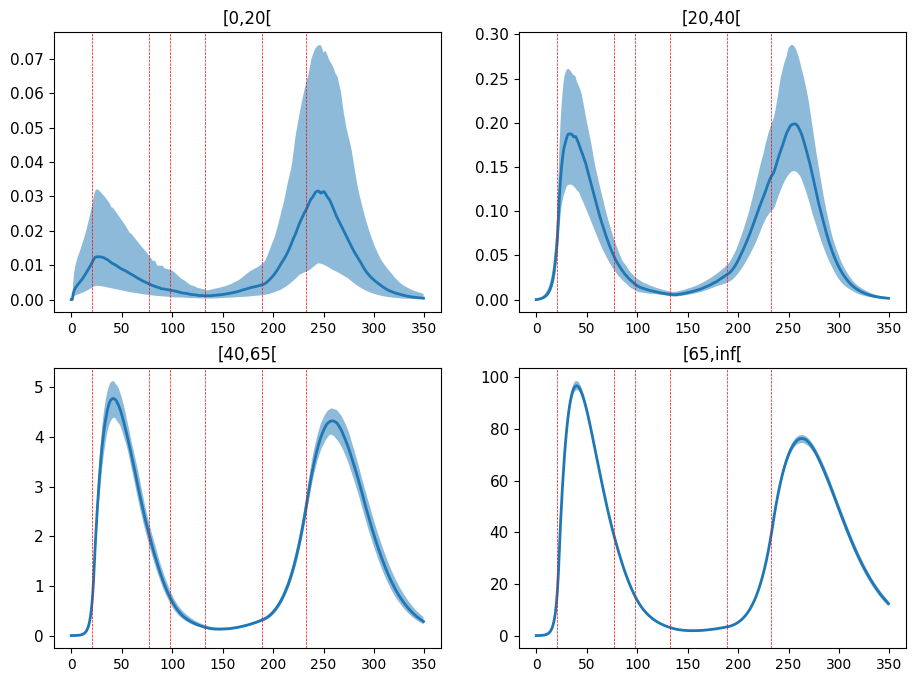

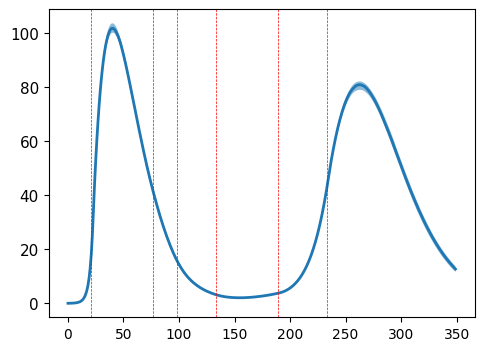

In [15]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,6,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,6,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,6,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,6,ax[1][1],"[65,inf[")

horizontal_line_for_period(ax[0][0])
horizontal_line_for_period(ax[0][1])
horizontal_line_for_period(ax[1][0])
horizontal_line_for_period(ax[1][1])


fig1.savefig('./visu_compartiment/D_entry_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,6,ax[0][0],"")
horizontal_line_for_period(ax[0][0])
fig1.savefig('./visu_compartiment/D_entry_4-total.pdf')


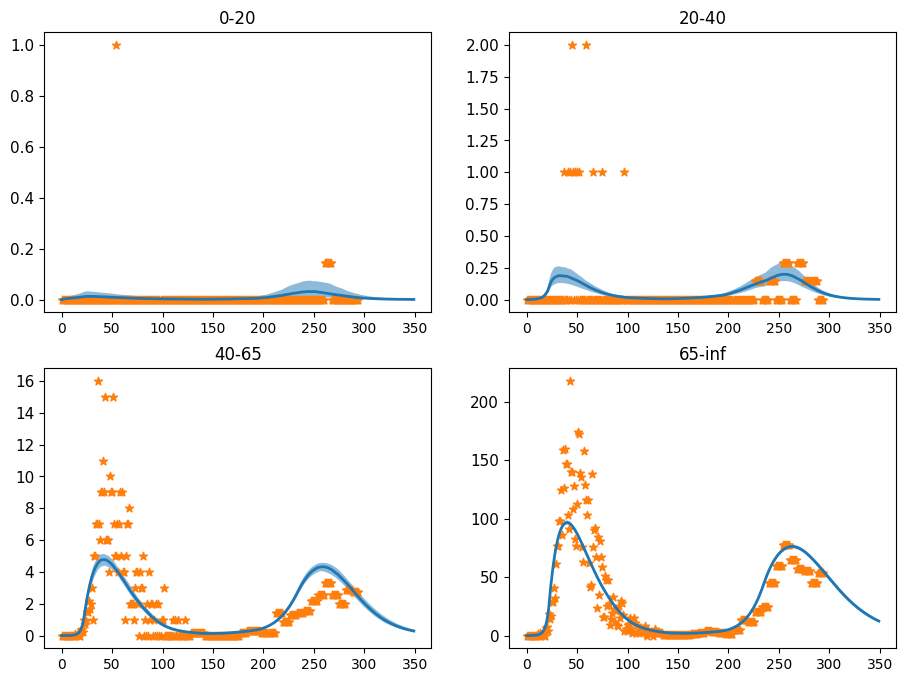

In [16]:
death_calibration = pd.read_csv('../data/DATA_calibration/Classe_4/death.csv')
hosp_calibration = pd.read_csv('../data/DATA_calibration/Classe_4/hosp.csv')

x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot_calibration(x,QUANTILES,0,6,ax[0][0],"0-20",death_calibration['0-20'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,1,6,ax[0][1],"20-40",death_calibration['20-40'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,2,6,ax[1][0],"40-65",death_calibration['40-65'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,3,6,ax[1][1],"65-inf",death_calibration['65-inf'],0,0,0)


fig1.savefig('./Calibration/D_entry_4.pdf')


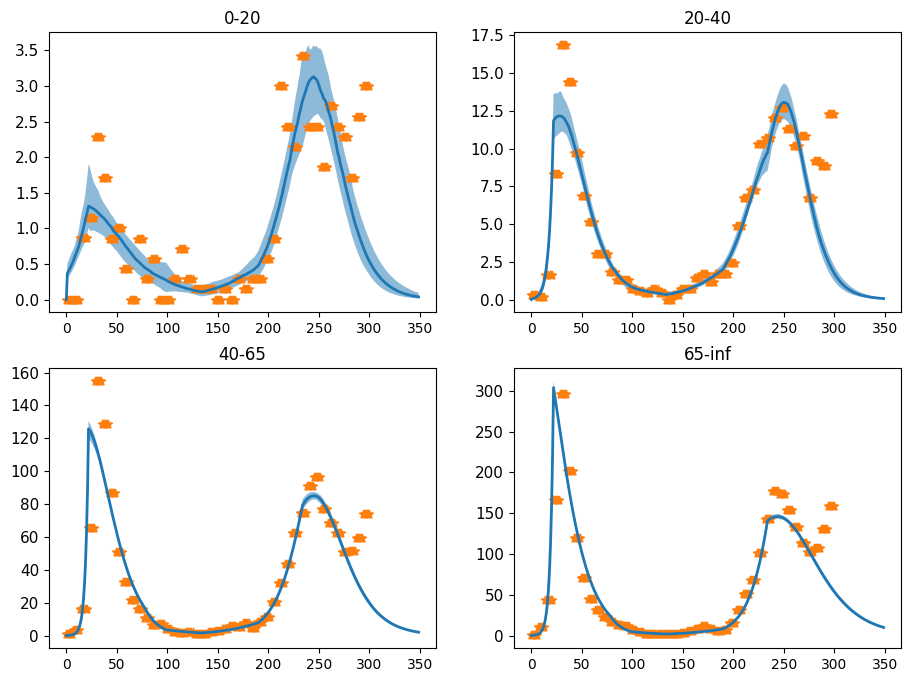

In [17]:
death_calibration = pd.read_csv('../data/DATA_calibration/Classe_4/death.csv')
hosp_calibration = pd.read_csv('../data/DATA_calibration/Classe_4/hosp.csv')

x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot_calibration(x,QUANTILES,0,5,ax[0][0],"0-20",hosp_calibration['0-20'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,1,5,ax[0][1],"20-40",hosp_calibration['20-40'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,2,5,ax[1][0],"40-65",hosp_calibration['40-65'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,3,5,ax[1][1],"65-inf",hosp_calibration['65-inf'],0,0,0)


fig1.savefig('./Calibration/Q_entry_4.pdf')

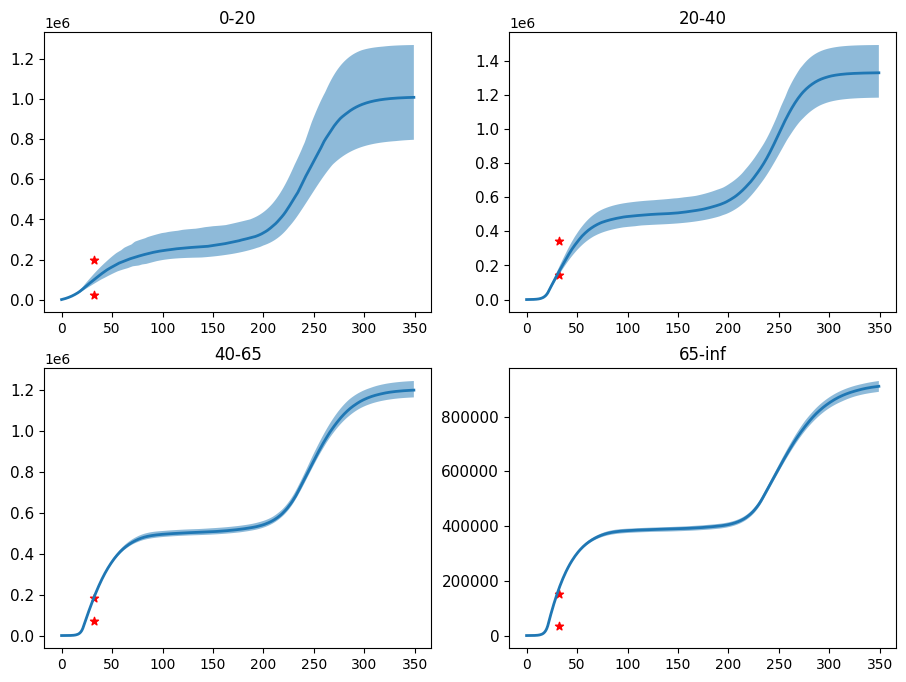

In [18]:
PROP_PAR_CLASSE4 = [0.2309419, 0.2647056, 0.3314419, 0.1729106]
pop_tot = 17282163.0
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))


quantiles_to_plot_calibration(x,QUANTILES,0,2,ax[0][0],"0-20",hosp_calibration['0-20'],1,0.006*pop_tot*PROP_PAR_CLASSE4[0],0.049*pop_tot*PROP_PAR_CLASSE4[0])
quantiles_to_plot_calibration(x,QUANTILES,1,2,ax[0][1],"20-40",hosp_calibration['20-40'],1,0.032*pop_tot*PROP_PAR_CLASSE4[1],0.075*pop_tot*PROP_PAR_CLASSE4[1])
quantiles_to_plot_calibration(x,QUANTILES,2,2,ax[1][0],"40-65",hosp_calibration['40-65'],1,0.012*pop_tot*PROP_PAR_CLASSE4[2],0.032*pop_tot*PROP_PAR_CLASSE4[2])
quantiles_to_plot_calibration(x,QUANTILES,3,2,ax[1][1],"65-inf",hosp_calibration['65-inf'],1,0.012*pop_tot*PROP_PAR_CLASSE4[3],0.051*pop_tot*PROP_PAR_CLASSE4[3])
#quantiles_to_plot_calibration(x,QUANTILES,4,2,ax[4][2],"R",hosp_calibration['total'],1,0.021*pop_tot,0.037*pop_tot)


fig1.savefig('./Calibration/Sero_4.pdf')

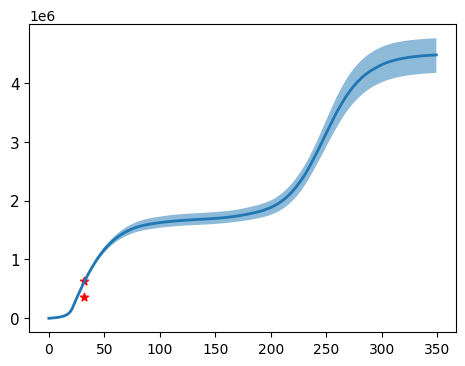

In [19]:
PROP_PAR_CLASSE4 = [0.2309419, 0.2647056, 0.3314419, 0.1729106]
pop_tot = 17282163.0
nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)


quantiles_to_plot_calibration(x,QUANTILES,4,2,ax[0][0],"",hosp_calibration['total'],1,0.021*pop_tot,0.037*pop_tot)


fig1.savefig('./Calibration/Sero_4_total.pdf')

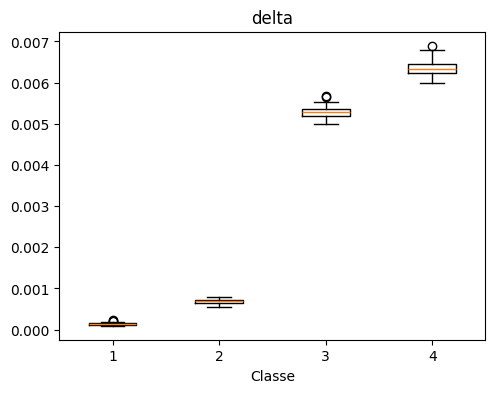

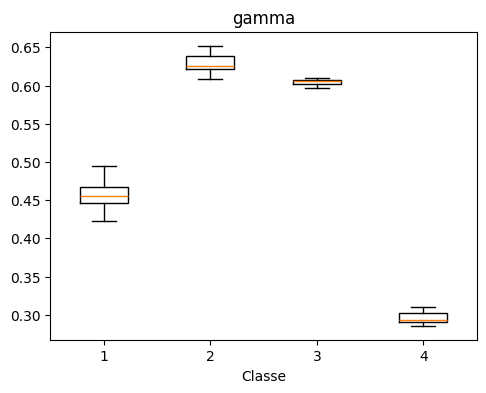

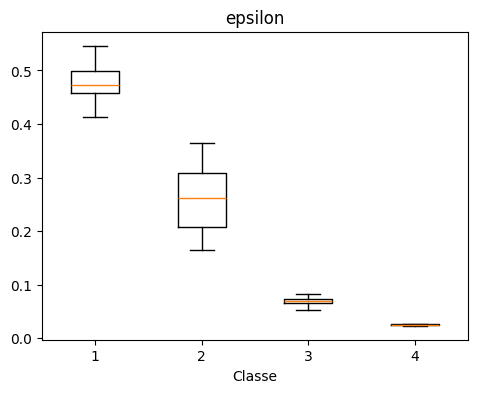

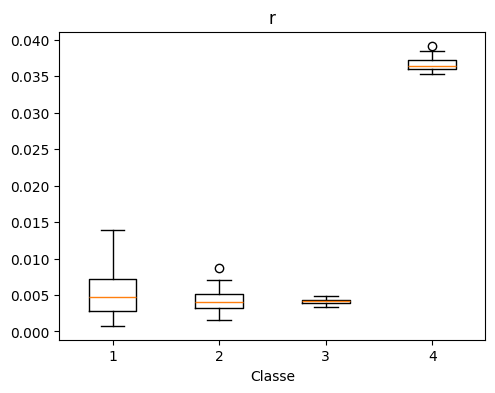

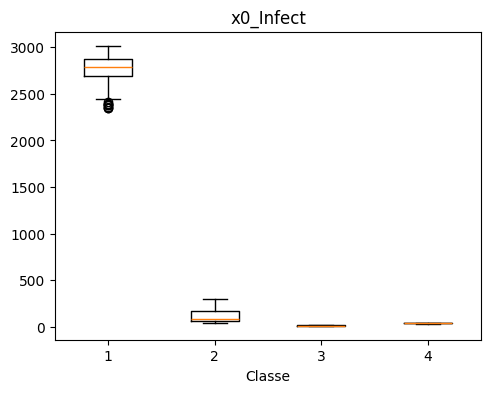

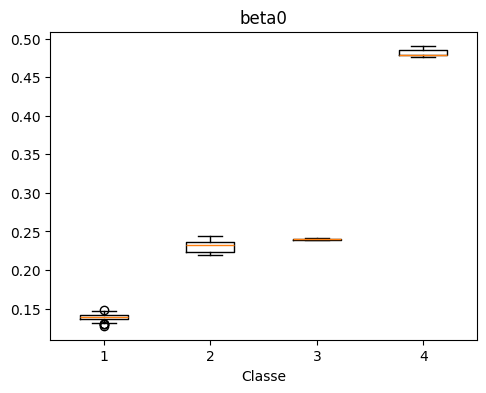

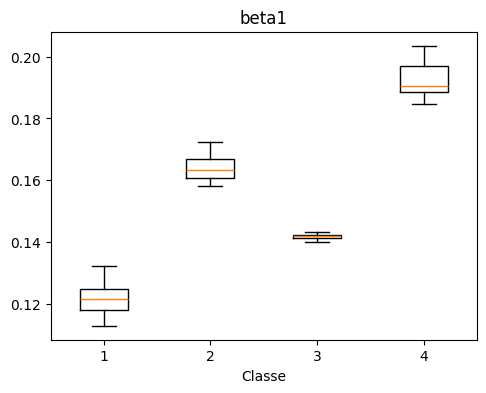

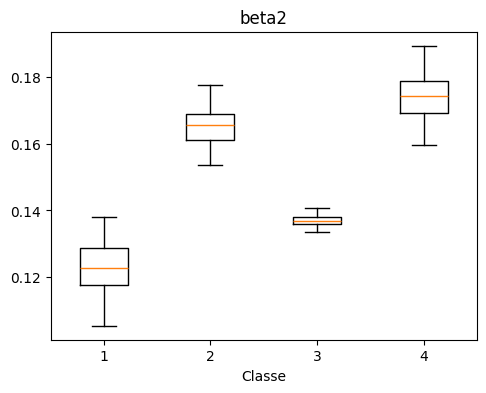

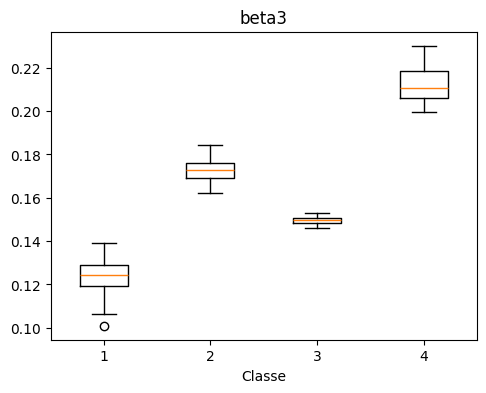

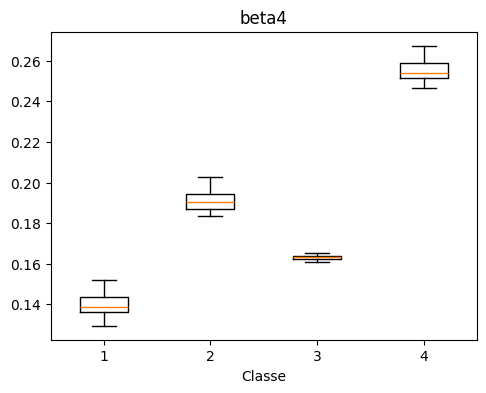

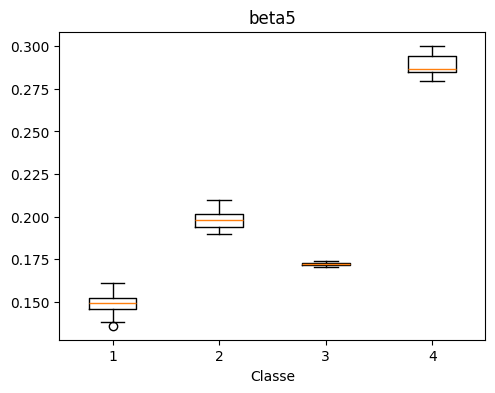

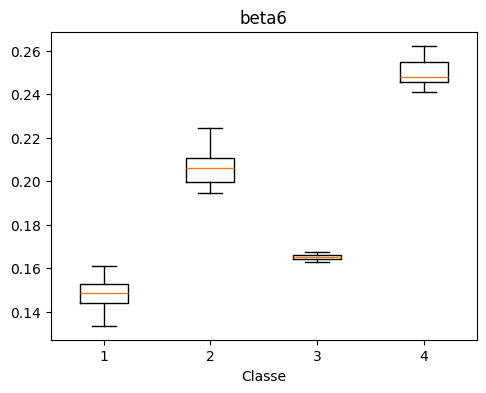

In [20]:
file_path = '../data/MCMC_param/save_MCMC.csv'
parametres = pd.read_csv(file_path)
#quantiles = parametres.quantile([0.25, 0.5, 0.75])
#print(quantiles.transpose())

delta_df = pd.DataFrame()
gamma_df = pd.DataFrame()
epsilon_df = pd.DataFrame()
r_df = pd.DataFrame()
x0Infect_df = pd.DataFrame()
beta0_df = pd.DataFrame()
beta1_df = pd.DataFrame()
beta2_df = pd.DataFrame()
beta3_df = pd.DataFrame()
beta4_df = pd.DataFrame()
beta5_df = pd.DataFrame()
beta6_df = pd.DataFrame()


for i in range(4):
    delta_df = pd.concat([delta_df, parametres.iloc[:,12*i + 0]],axis=1)
    gamma_df = pd.concat([gamma_df, parametres.iloc[:,12*i + 1]],axis=1)
    epsilon_df = pd.concat([epsilon_df, parametres.iloc[:,12*i + 2]],axis=1)
    r_df = pd.concat([r_df, parametres.iloc[:,12*i + 3]],axis=1)
    x0Infect_df = pd.concat([x0Infect_df, parametres.iloc[:,12*i + 4]],axis=1)
    beta0_df = pd.concat([beta0_df, parametres.iloc[:,12*i + 5]],axis=1)
    beta1_df = pd.concat([beta1_df, parametres.iloc[:,12*i + 6]],axis=1)
    beta2_df = pd.concat([beta2_df, parametres.iloc[:,12*i + 7]],axis=1)
    beta3_df = pd.concat([beta3_df, parametres.iloc[:,12*i + 8]],axis=1)
    beta4_df = pd.concat([beta4_df, parametres.iloc[:,12*i + 9]],axis=1)
    beta5_df = pd.concat([beta5_df, parametres.iloc[:,12*i + 10]],axis=1)
    beta6_df = pd.concat([beta6_df, parametres.iloc[:,12*i + 11]],axis=1)
    

nrows1 = 1
ncols1 = 1

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(delta_df)
ax.title.set_text("delta")
plt.xlabel("Classe")
fig1.savefig('./Parametres/delta.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(gamma_df)
ax.title.set_text("gamma")
plt.xlabel("Classe")
fig1.savefig('./Parametres/gamma.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(epsilon_df)
ax.title.set_text("epsilon")
plt.xlabel("Classe")
fig1.savefig('./Parametres/epsilon.pdf')
138832520965966,0.138832520965966,0.142142945517615,0.145317585116604,0.152998865620084,0.000795754572085,0.650912590993597,0.175615891406716,0.002488495361402,0.00000855088104,0.227616605212506,0.168222962038833,0.227616605212506,0.227616605212506,0.194464327961374,0.199352830500847,0.205732046379087,0.00520610326475,0.608322886289657,0.071877735949658,0.004029354667085,0.00000098062318,0.239168795445982,0.142957331940567,0.239168795445982,0.239168795445982,0.165119174812736,0.173392932410378,0.166663792277432,0.006063025623275,0.285739506919997,0.024839986050358,0.037214680972925,0.000002151358768,0.478532728388583,0.185086900783196,0.478532728388583,0.478532728388583,0.249574803351663,0.279831854604854,0.241995402814401
0.00011272187786,0.454722016849573,0.48528246496258,0.003730447660509,0.000171300127199,0.142886123061851,0.121458761854222,0.142886123061851,0.142886123061851,0.143082076500669,0.154828638621692,0.156019659479722,0.00077479483649,0.647355883064788,0.165205152275893,0.002651118402967,0.000007123680079,0.229280534256112,0.168156537302237,0.229280534256112,0.229280534256112,0.193046284289602,0.20023585785057,0.205788250778753,0.005186852985942,0.606988064181424,0.070607136791721,0.004526257276864,0.000000979604976,0.238866572516787,0.1427995662969,0.238866572516787,0.238866572516787,0.163342019976144,0.17337687615962,0.1659201017814,0.006113174290991,0.286277642021745,0.025097181320658,0.036594262014044,0.000002164453339,0.479130288216033,0.184724214818659,0.479130288216033,0.479130288216033,0.247116380489233,0.281946906354777,0.241123311627279
0.000131735677076,0.46273529037438,0.50170385525285,0.005950088672681,0.0001722002511,0.139369689198513,0.120292729853722,0.139369689198513,0.139369689198513,0.141106891044219,0.147445301062744,0.15364423749189,0.000744735335766,0.647574403975157,0.176388291926329,0.00294851605104,0.000007155140669,0.231823902827352,0.167646743431919,0.231823902827352,0.231823902827352,0.195004021744617,0.200967972322928,0.207538313306992,0.005340136953705,0.60870443386602,0.07434978443074,0.003973061516957,0.000000988979506,0.239136836856782,0.142765380193613,0.239136836856782,0.239136836856782,0.164006618286295,0.173173031105094,0.165793940283532,0.006370027756608,0.28754011415789,0.023830560183432,0.035847839596089,0.00000219173074,0.478767279801194,0.185471362352308,0.478767279801194,0.478767279801194,0.248557814546394,0.280607228892543,0.241554581388446
0.000128714792874,0.463673841329309,0.501108453705452,0.004325291264935,0.000169917527722,0.141931364041388,0.12155873939538,0.141931364041388,0.141931364041388,0.142016463967965,0.150818765571505,0.149113540347992,0.000710588984901,0.64210759788062,0.185736015816457,0.001585475530064,0.000008242206764,0.228675837989283,0.167336837652733,0.228675837989283,0.228675837989283,0.195241418219038,0.201562941965945,0.21083752878489,0.005360260403934,0.607413088340479,0.072716035471994,0.004385647905148,0.000000976066546,0.239169739418735,0.14239640200862,0.239169739418735,0.239169739418735,0.162955928951161,0.172967964763125,0.165875878725845,0.006133956541873,0.286627181675019,0.023373976313291,0.035566870212389,0.000002212750001,0.478485352646776,0.185019733342344,0.478485352646776,0.478485352646776,0.248165045131973,0.280948117375339,0.242119564847769
0.000143816800695,0.466228712657715,0.515490955812024,0.006274003134167,0.000166735877633,0.139940853311478,0.125716552675555,0.139940853311478
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(r_df)
ax.title.set_text("r")
plt.xlabel("Classe")
fig1.savefig('./Parametres/r.pdf')

pop_tot = 17282163.0
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(x0Infect_df*pop_tot)
ax.title.set_text("x0_Infect")
plt.xlabel("Classe")
fig1.savefig('./Parametres/x0_Infect.pdf')



fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(beta0_df)
ax.title.set_text("beta0")
plt.xlabel("Classe")
fig1.savefig('./Parametres/beta0.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(beta1_df)
ax.title.set_text("beta1")
plt.xlabel("Classe")
fig1.savefig('./Parametres/beta1.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(beta2_df)
ax.title.set_text("beta2")
plt.xlabel("Classe")
fig1.savefig('./Parametres/beta2.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(beta3_df)
ax.title.set_text("beta3")
plt.xlabel("Classe")
fig1.savefig('./Parametres/beta3.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(beta4_df)
ax.title.set_text("beta4")
plt.xlabel("Classe")
fig1.savefig('./Parametres/beta4.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(beta5_df)
ax.title.set_text("beta5")
plt.xlabel("Classe")
fig1.savefig('./Parametres/beta5.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(beta6_df)
ax.title.set_text("beta6")
plt.xlabel("Classe")
fig1.savefig('./Parametres/beta6.pdf')


In [21]:
from scipy import stats
import scikit_posthocs as sp

df = delta_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(delta_df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)


KruskalResult(statistic=374.06497818048035, pvalue=9.170479216755381e-81)

              delta_0       delta_1       delta_2       delta_3
delta_0  1.000000e+00  2.877062e-09  1.046357e-33  2.045294e-74
delta_1  2.877062e-09  1.000000e+00  2.877062e-09  1.046357e-33
delta_2  1.046357e-33  2.877062e-09  1.000000e+00  2.877062e-09
delta_3  2.045294e-74  1.046357e-33  2.877062e-09  1.000000e+00


In [22]:
df = gamma_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)

KruskalResult(statistic=373.57270174563587, pvalue=1.1722063248450862e-80)

              gamma_0       gamma_1       gamma_2       gamma_3
gamma_0  1.000000e+00  1.073053e-33  2.534492e-09  2.534492e-09
gamma_1  1.073053e-33  1.000000e+00  2.534492e-09  2.964830e-74
gamma_2  2.534492e-09  2.534492e-09  1.000000e+00  8.159753e-34
gamma_3  2.534492e-09  2.964830e-74  8.159753e-34  1.000000e+00


In [23]:
df = epsilon_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)

KruskalResult(statistic=374.0648379052368, pvalue=9.171120724439595e-81)

              eps_0         eps_1         eps_2         eps_3
eps_0  1.000000e+00  2.877083e-09  1.046386e-33  2.045424e-74
eps_1  2.877083e-09  1.000000e+00  2.877083e-09  1.046386e-33
eps_2  1.046386e-33  2.877083e-09  1.000000e+00  2.877083e-09
eps_3  2.045424e-74  1.046386e-33  2.877083e-09  1.000000e+00


In [24]:
df = r_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)

KruskalResult(statistic=226.7921057356607, pvalue=6.8293038553126665e-49)

              r_0           r_1           r_2           r_3
r_0  1.000000e+00  5.436914e-01  5.436914e-01  3.085559e-29
r_1  5.436914e-01  1.000000e+00  9.863369e-01  4.538726e-36
r_2  5.436914e-01  9.863369e-01  1.000000e+00  4.377920e-36
r_3  3.085559e-29  4.538726e-36  4.377920e-36  1.000000e+00


In [25]:
df = beta0_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)

KruskalResult(statistic=362.50224837905216, pvalue=2.927018500422032e-78)

              beta0_0       beta0_1       beta0_2       beta0_3
beta0_0  1.000000e+00  9.916122e-11  5.278761e-31  2.045424e-74
beta0_1  9.916122e-11  1.000000e+00  3.701738e-07  5.278761e-31
beta0_2  5.278761e-31  3.701738e-07  1.000000e+00  9.916122e-11
beta0_3  2.045424e-74  5.278761e-31  9.916122e-11  1.000000e+00


In [26]:
df = beta1_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)

KruskalResult(statistic=374.0648379052368, pvalue=9.171120724439595e-81)

              beta1_0       beta1_1       beta1_2       beta1_3
beta1_0  1.000000e+00  1.046386e-33  2.877083e-09  2.045424e-74
beta1_1  1.046386e-33  1.000000e+00  2.877083e-09  2.877083e-09
beta1_2  2.877083e-09  2.877083e-09  1.000000e+00  1.046386e-33
beta1_3  2.045424e-74  2.877083e-09  1.046386e-33  1.000000e+00


In [27]:
df = beta2_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)

KruskalResult(statistic=354.3704992518701, pvalue=1.6877691589670062e-76)

              beta2_0       beta2_1       beta2_2       beta2_3
beta2_0  1.000000e+00  8.449739e-38  5.702500e-09  2.982217e-67
beta2_1  8.449739e-38  1.000000e+00  5.963636e-12  8.439028e-06
beta2_2  5.702500e-09  5.963636e-12  1.000000e+00  5.989026e-30
beta2_3  2.982217e-67  8.439028e-06  5.989026e-30  1.000000e+00


In [28]:
df = beta3_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)

KruskalResult(statistic=374.0648379052368, pvalue=9.171120724439595e-81)

              beta3_0       beta3_1       beta3_2       beta3_3
beta3_0  1.000000e+00  1.046386e-33  2.877083e-09  2.045424e-74
beta3_1  1.046386e-33  1.000000e+00  2.877083e-09  2.877083e-09
beta3_2  2.877083e-09  2.877083e-09  1.000000e+00  1.046386e-33
beta3_3  2.045424e-74  2.877083e-09  1.046386e-33  1.000000e+00


In [29]:
df = beta4_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)

KruskalResult(statistic=374.0648379052368, pvalue=9.171120724439595e-81)

              beta4_0       beta4_1       beta4_2       beta4_3
beta4_0  1.000000e+00  1.046386e-33  2.877083e-09  2.045424e-74
beta4_1  1.046386e-33  1.000000e+00  2.877083e-09  2.877083e-09
beta4_2  2.877083e-09  2.877083e-09  1.000000e+00  1.046386e-33
beta4_3  2.045424e-74  2.877083e-09  1.046386e-33  1.000000e+00


In [30]:
df = beta5_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)

KruskalResult(statistic=374.0648379052368, pvalue=9.171120724439595e-81)

              beta5_0       beta5_1       beta5_2       beta5_3
beta5_0  1.000000e+00  1.046386e-33  2.877083e-09  2.045424e-74
beta5_1  1.046386e-33  1.000000e+00  2.877083e-09  2.877083e-09
beta5_2  2.877083e-09  2.877083e-09  1.000000e+00  1.046386e-33
beta5_3  2.045424e-74  2.877083e-09  1.046386e-33  1.000000e+00


In [31]:
df = beta6_df
print(stats.kruskal(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]))
print()
melt = pd.melt(df)
p_values = sp.posthoc_dunn(melt, val_col='value', group_col='variable', p_adjust='holm')
print(p_values)

KruskalResult(statistic=374.0648379052368, pvalue=9.171120724439595e-81)

              beta6_0       beta6_1       beta6_2       beta6_3
beta6_0  1.000000e+00  1.046386e-33  2.877083e-09  2.045424e-74
beta6_1  1.046386e-33  1.000000e+00  2.877083e-09  2.877083e-09
beta6_2  2.877083e-09  2.877083e-09  1.000000e+00  1.046386e-33
beta6_3  2.045424e-74  2.877083e-09  1.046386e-33  1.000000e+00


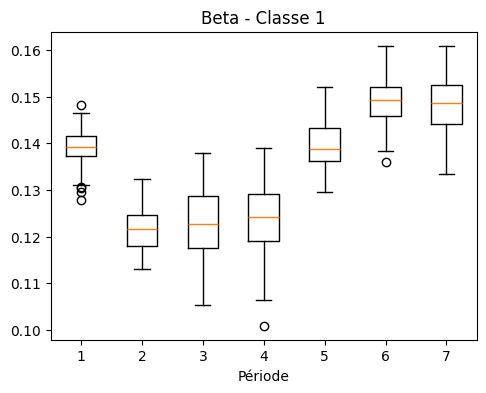

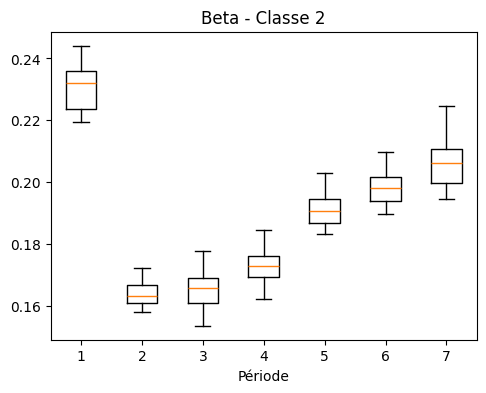

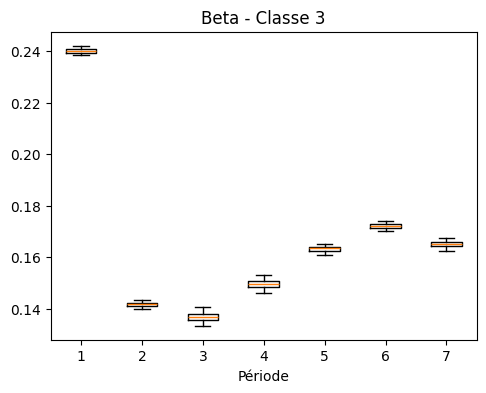

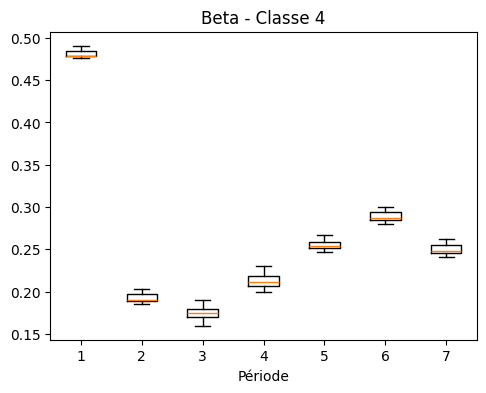

In [32]:
file_path = '../data/MCMC_param/save_MCMC.csv'
parametres = pd.read_csv(file_path)
#quantiles = parametres.quantile([0.25, 0.5, 0.75])
#print(quantiles.transpose())

classe1_df = pd.DataFrame()
classe2_df = pd.DataFrame()
classe3_df = pd.DataFrame()
classe4_df = pd.DataFrame()

for i in range(7):
    classe1_df = pd.concat([classe1_df, parametres.iloc[:,0 + 5 + i]],axis=1)
    classe2_df = pd.concat([classe2_df, parametres.iloc[:,12 + 5 + i]],axis=1)
    classe3_df = pd.concat([classe3_df, parametres.iloc[:,24 + 5 + i]],axis=1)
    classe4_df = pd.concat([classe4_df, parametres.iloc[:,36 + 5 + i]],axis=1)


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(classe1_df)
ax.title.set_text("Beta - Classe 1")
plt.xlabel("Période")
fig1.savefig('./Parametres/beta-Classe1.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(classe2_df)
ax.title.set_text("Beta - Classe 2")
plt.xlabel("Période")
fig1.savefig('./Parametres/beta-Classe2.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(classe3_df)
ax.title.set_text("Beta - Classe 3")
plt.xlabel("Période")
fig1.savefig('./Parametres/beta-Classe3.pdf')

fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
bp = ax.boxplot(classe4_df)
ax.title.set_text("Beta - Classe 4")
plt.xlabel("Période")
fig1.savefig('./Parametres/beta-Classe4.pdf')

In [33]:
import time 
import os as os
import subprocess

for i in range(100):
        executable = "../build/Main_classe_4"
        dir_path = os.path.abspath(os.path.dirname(executable))
        executable_name = os.path.basename(executable)
        subprocess.run([dir_path + "/" + executable_name, str(i)], cwd=dir_path)


In [34]:

CLASSE = []
QUANTILES = []

file_path = '../temp/output_' + str(0) + '.csv'

for classe in range(nb_classe):
    # Initialisation des dictionnaires pour stocker les données
    data_S = {}
    data_I = {}
    data_R = {}
    data_Q = {}
    data_D = {}
    data_Q_entry = {}
    data_D_entry = {}

    CLASSE_temp = []
    CLASSE_temp.append(data_S)
    CLASSE_temp.append(data_I)
    CLASSE_temp.append(data_R)
    CLASSE_temp.append(data_Q)
    CLASSE_temp.append(data_D)
    CLASSE_temp.append(data_Q_entry)
    CLASSE_temp.append(data_D_entry)
    

    for i in range(nb_mcmc):
        file_path = '../temp/output_' + str(i) + '.csv'
        # Lecture du fichier CSV
        df = pd.read_csv(file_path)
        
        # Stockage des colonnes dans les dictionnaires
        CLASSE_temp[0][i] = df.iloc[:,classe*nb_compartiment + 0]
        CLASSE_temp[1][i] = df.iloc[:,classe*nb_compartiment + 1]
        CLASSE_temp[2][i] = df.iloc[:,classe*nb_compartiment + 2]
        CLASSE_temp[3][i] = df.iloc[:,classe*nb_compartiment + 3]
        CLASSE_temp[4][i] = df.iloc[:,classe*nb_compartiment + 4]
        CLASSE_temp[5][i] = df.iloc[:,classe*nb_compartiment + 5]
        CLASSE_temp[6][i] = df.iloc[:,classe*nb_compartiment + 6]

    # Création des DataFrames finaux
    CLASSE_temp[0] = pd.DataFrame(CLASSE_temp[0]).transpose()*17282163
    CLASSE_temp[1] = pd.DataFrame(CLASSE_temp[1]).transpose()*17282163
    CLASSE_temp[2] = pd.DataFrame(CLASSE_temp[2]).transpose()*17282163
    CLASSE_temp[3] = pd.DataFrame(CLASSE_temp[3]).transpose()*17282163
    CLASSE_temp[4] = pd.DataFrame(CLASSE_temp[4]).transpose()*17282163
    CLASSE_temp[5] = pd.DataFrame(CLASSE_temp[5]).transpose()*17282163
    CLASSE_temp[6] = pd.DataFrame(CLASSE_temp[6]).transpose()*17282163





    QUANTILES_temp = []

    QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))


    CLASSE.append(CLASSE_temp)
    QUANTILES.append(QUANTILES_temp)


#calcul du total

CLASSE_temp=CLASSE[0]
for classe in range(1,nb_classe):
    for comp in range(nb_compartiment):
            CLASSE_temp[comp] = CLASSE_temp[comp] + CLASSE[classe][comp]



QUANTILES_temp = []
QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))

QUANTILES.append(QUANTILES_temp)
CLASSE.append(CLASSE_temp)




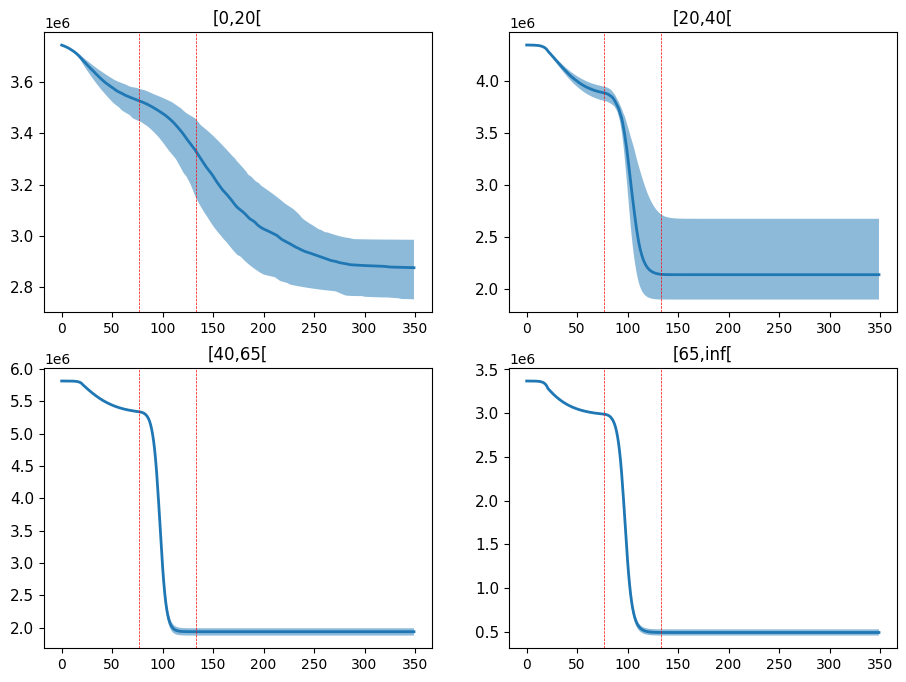

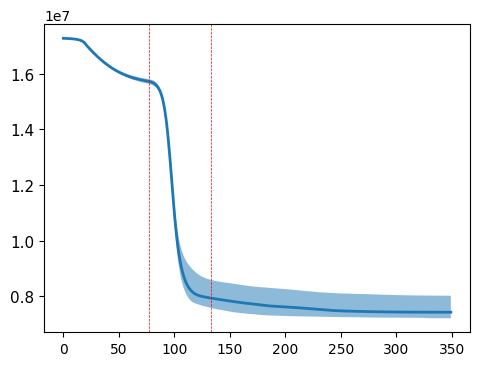

In [35]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,0,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,0,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,0,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,0,ax[1][1],"[65,inf[")


fig1.savefig('./scenario/S_4.pdf')


date_periode = [21,77,98,133,189,233]
ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,0,ax[0][0],"")
ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)

fig1.savefig('./scenario/S_4-total.pdf')

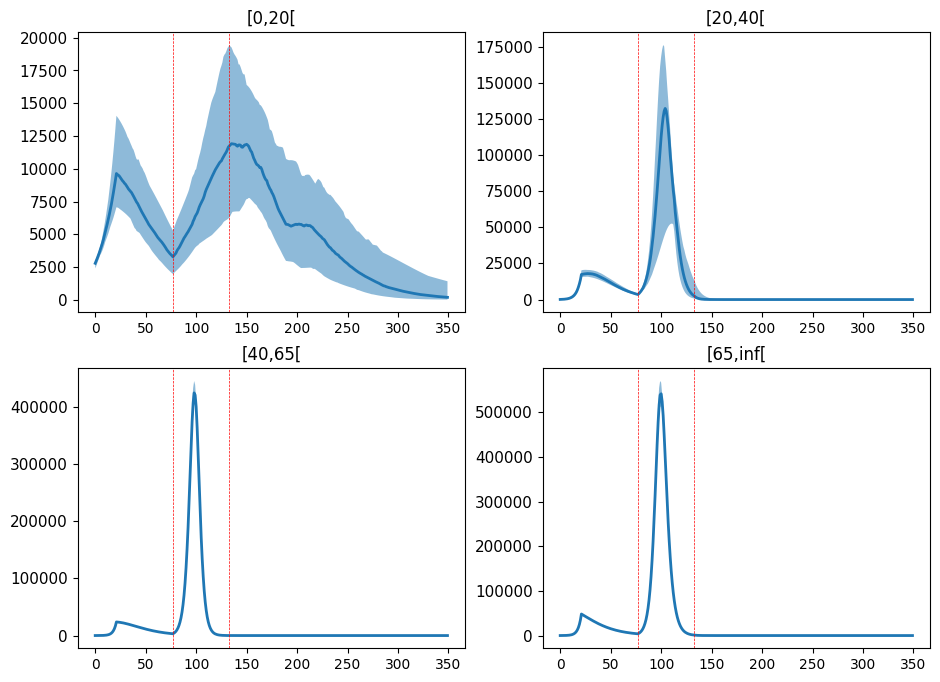

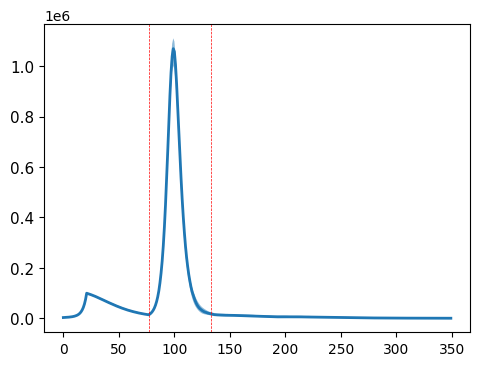

In [36]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,1,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,1,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,1,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,1,ax[1][1],"[65,inf[")

ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)


fig1.savefig('./scenario/I_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,1,ax[0][0],"")
ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
fig1.savefig('./scenario/I_4-total.pdf')

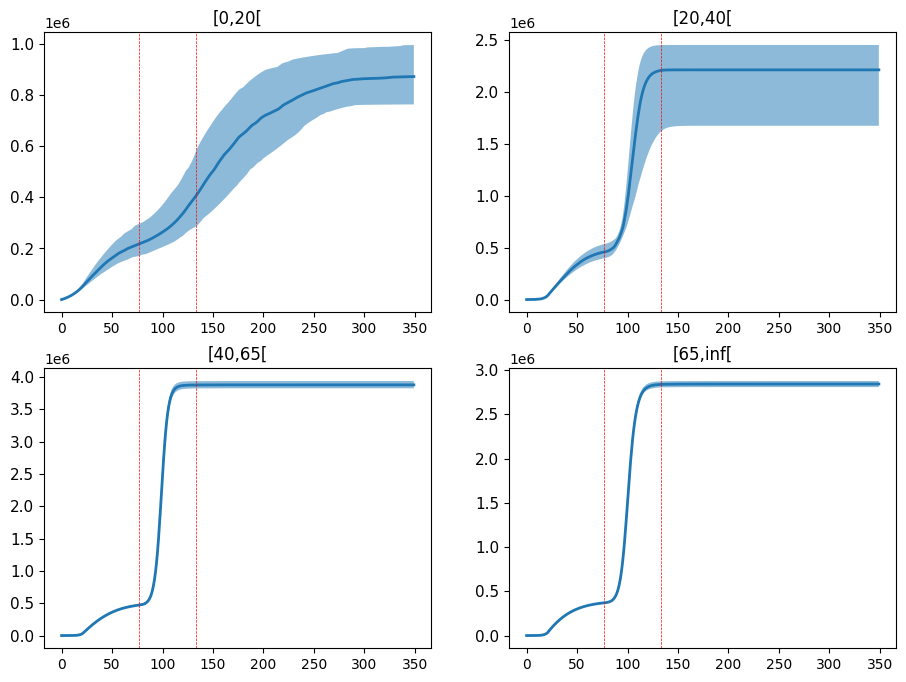

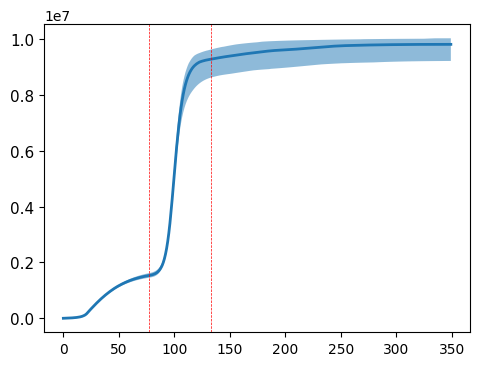

In [37]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,2,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,2,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,2,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,2,ax[1][1],"[65,inf[")

ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)

fig1.savefig('./scenario/R_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,2,ax[0][0],"")
ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
fig1.savefig('./scenario/R_4-total.pdf')

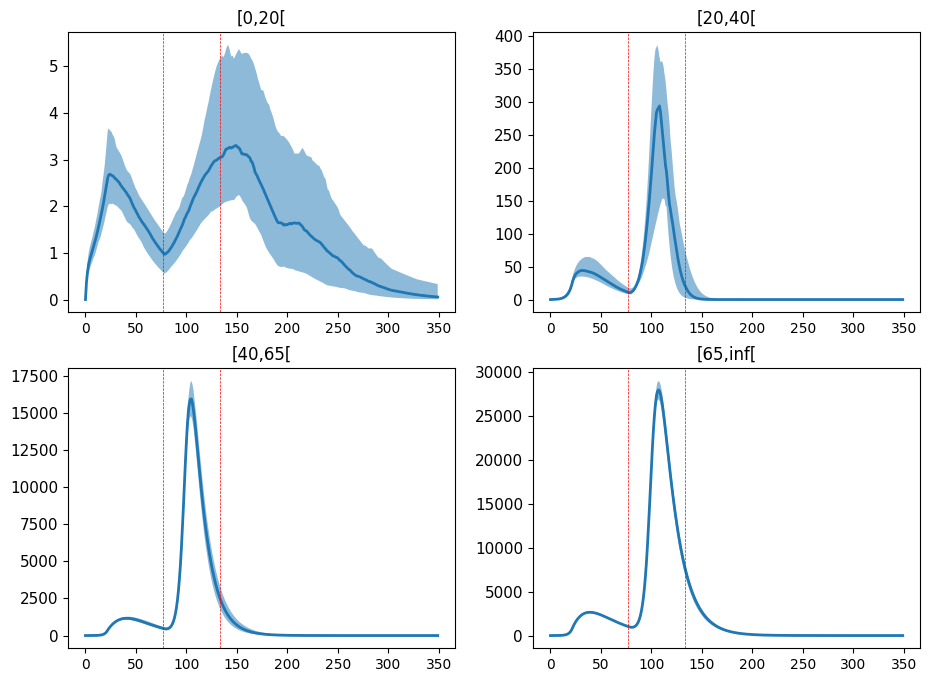

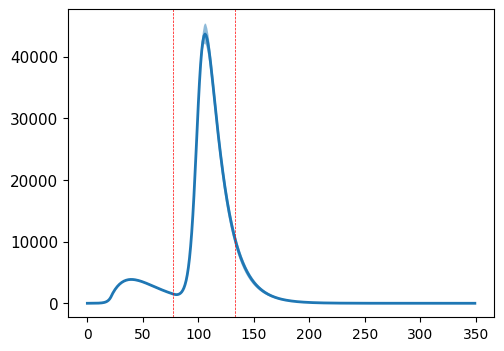

In [38]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,3,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,3,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,3,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,3,ax[1][1],"[65,inf[")

ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)

fig1.savefig('./scenario/Q_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,3,ax[0][0],"")
ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
fig1.savefig('./scenario/Q_4-total.pdf')

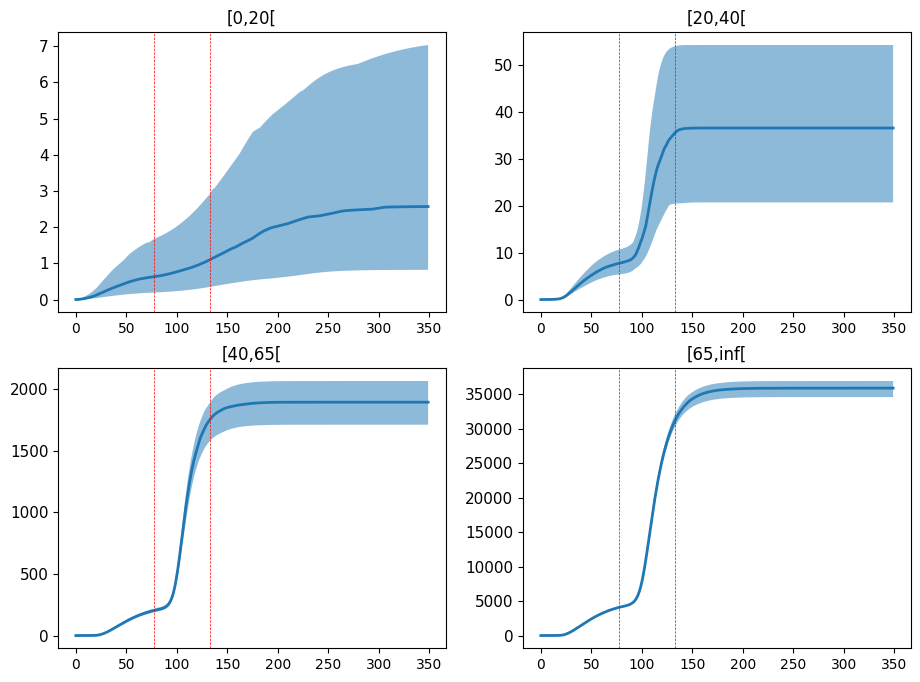

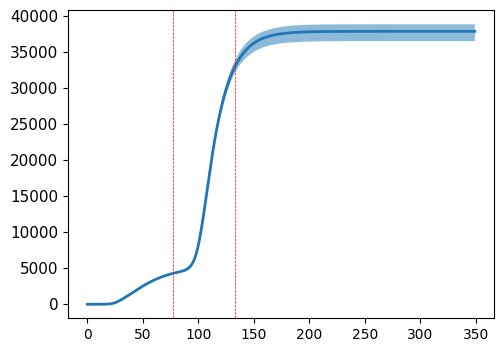

In [39]:
x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot(x,QUANTILES,0,4,ax[0][0],"[0,20[")
quantiles_to_plot(x,QUANTILES,1,4,ax[0][1],"[20,40[")
quantiles_to_plot(x,QUANTILES,2,4,ax[1][0],"[40,65[")
quantiles_to_plot(x,QUANTILES,3,4,ax[1][1],"[65,inf[")

ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)

fig1.savefig('./scenario/D_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,4,ax[0][0],"")
ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
fig1.savefig('./scenario/D_4-total.pdf')

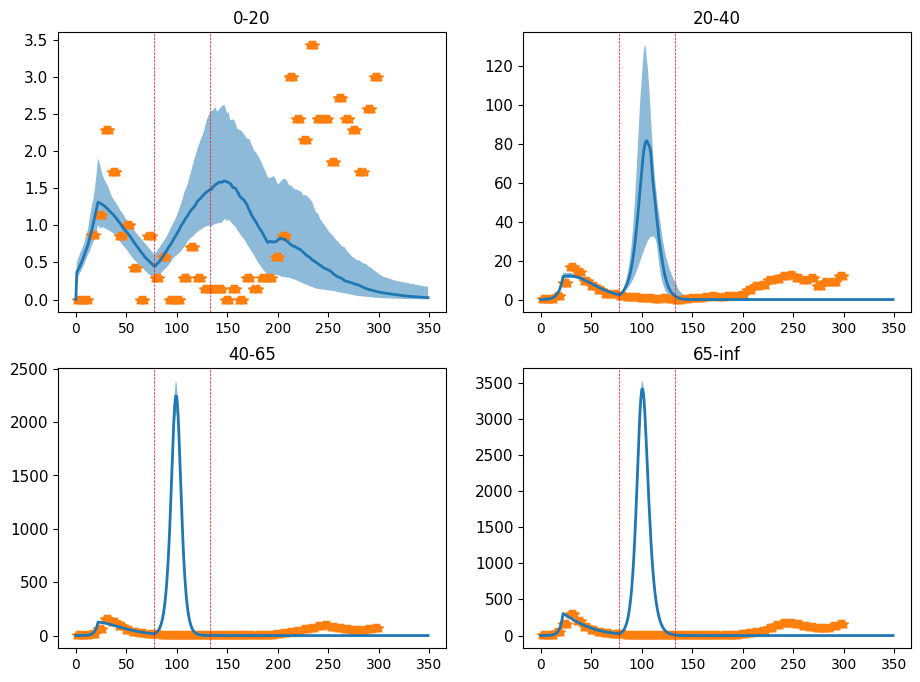

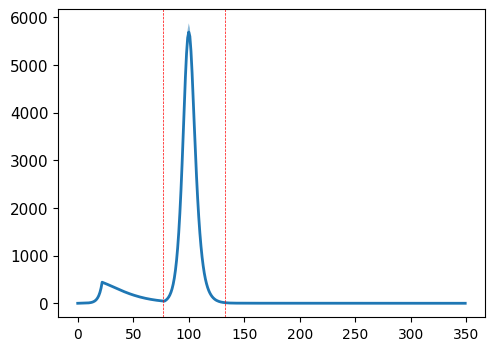

In [40]:
death_calibration = pd.read_csv('../data/DATA_calibration/Classe_4/death.csv')
hosp_calibration = pd.read_csv('../data/DATA_calibration/Classe_4/hosp.csv')

x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot_calibration(x,QUANTILES,0,5,ax[0][0],"0-20",hosp_calibration['0-20'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,1,5,ax[0][1],"20-40",hosp_calibration['20-40'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,2,5,ax[1][0],"40-65",hosp_calibration['40-65'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,3,5,ax[1][1],"65-inf",hosp_calibration['65-inf'],0,0,0)

ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)

fig1.savefig('./scenario/Q_entry_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,5,ax[0][0],"")
ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
fig1.savefig('./scenario/Q_entry_4-total.pdf')

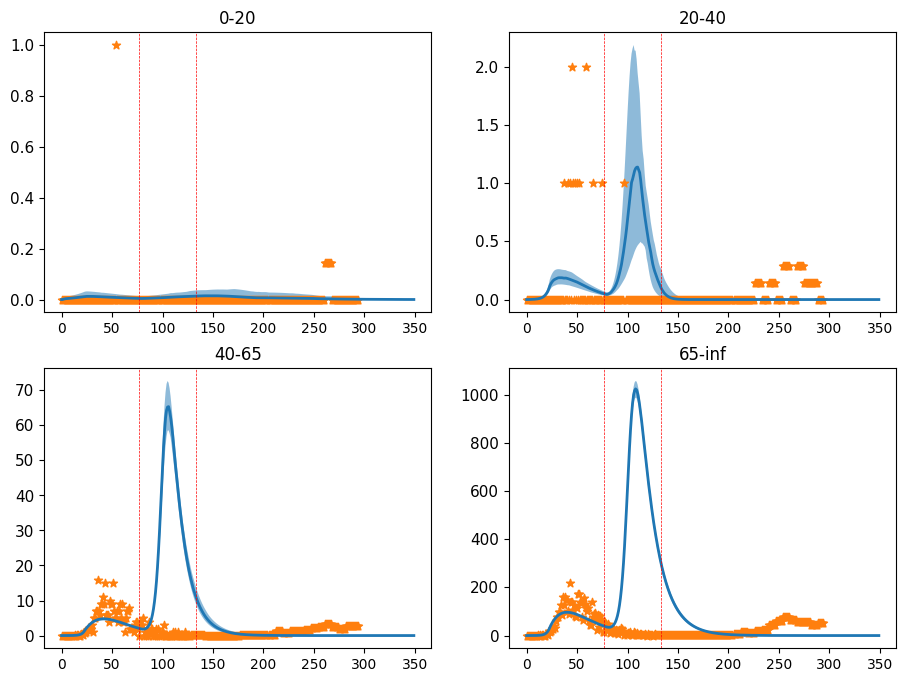

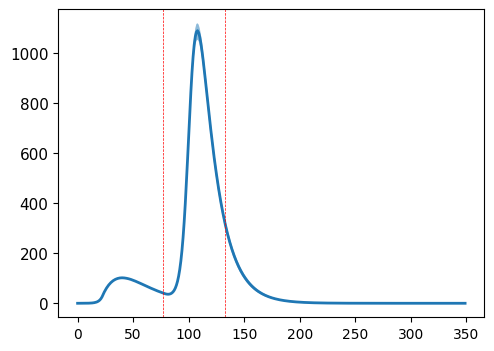

In [41]:
death_calibration = pd.read_csv('../data/DATA_calibration/Classe_4/death.csv')
hosp_calibration = pd.read_csv('../data/DATA_calibration/Classe_4/hosp.csv')

x = range(350)
nrows1 = 2
ncols1 = 2
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1))
quantiles_to_plot_calibration(x,QUANTILES,0,6,ax[0][0],"0-20",death_calibration['0-20'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,1,6,ax[0][1],"20-40",death_calibration['20-40'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,2,6,ax[1][0],"40-65",death_calibration['40-65'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,3,6,ax[1][1],"65-inf",death_calibration['65-inf'],0,0,0)

ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[1][1].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)

fig1.savefig('./scenario/D_entry_4.pdf')


nrows1 = 1
ncols1 = 1
fig1, ax = plt.subplots(nrows=nrows1,ncols=ncols1,figsize=(5.5*nrows1,4*ncols1),squeeze=False)
quantiles_to_plot(x,QUANTILES,4,6,ax[0][0],"")
ax[0][0].axvline(x=date_periode[1], linestyle='dashed', color='red',linewidth=0.5)
ax[0][0].axvline(x=date_periode[3], linestyle='dashed', color='red',linewidth=0.5)
fig1.savefig('./scenario/D_entry_4-total.pdf')